In [28]:
import os
import numpy as np
import yaml
import pandas as pd
import networkx as nx

In [29]:
X_train = pd.read_csv('Louvain/node_x_train.csv', index_col=0)
y_train = pd.read_csv('Louvain/node_y_train.csv', index_col=0)

In [30]:
runs = 100

In [31]:
feature_list = list(X_train.columns)
data = np.array(X_train)
labels = np.squeeze(np.array(y_train))

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

accuracy_scores = []
feature_importances = {}
for f in feature_list:
    feature_importances[f] = []
rows = []

skf = StratifiedKFold(n_splits=5)
rf = RandomForestClassifier()

fold_count = 0

for run in range(1, runs+1):
    
    for i in range(5):
        
        fold_count += 1
        
        folds = next(skf.split(data, labels), None)
        
        X_train_fold = data[folds[0], :]
        X_val_fold = data[folds[1], :]
        y_train_fold = labels[folds[0]]
        y_val_fold = labels[folds[1]]
        
        model = rf.fit(X_train_fold, y_train_fold)
        predictions = rf.predict(X_val_fold)
    
        accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

        row = {"run": fold_count}
        for j, feature in enumerate(feature_list):
            row[feature] = rf.feature_importances_[j]
        rows.append(row)

In [33]:
print(accuracy_scores[:100])
print('~~~~~~~~~~~~~~~~~~~~~')
print(np.mean(accuracy_scores))

[0.9026275115919629, 0.9134466769706336, 0.9165378670788253, 0.9180834621329211, 0.9119010819165378, 0.9072642967542504, 0.9088098918083463, 0.9072642967542504, 0.9119010819165378, 0.910355486862442, 0.9088098918083463, 0.9119010819165378, 0.9149922720247295, 0.9088098918083463, 0.9119010819165378, 0.9180834621329211, 0.9165378670788253, 0.9180834621329211, 0.9119010819165378, 0.9134466769706336, 0.9088098918083463, 0.9057187017001546, 0.9088098918083463, 0.9072642967542504, 0.9072642967542504, 0.9057187017001546, 0.9134466769706336, 0.9165378670788253, 0.9088098918083463, 0.9041731066460588, 0.910355486862442, 0.9072642967542504, 0.9088098918083463, 0.910355486862442, 0.9180834621329211, 0.9149922720247295, 0.910355486862442, 0.9072642967542504, 0.9149922720247295, 0.9134466769706336, 0.9119010819165378, 0.9057187017001546, 0.9057187017001546, 0.910355486862442, 0.9088098918083463, 0.910355486862442, 0.9088098918083463, 0.9180834621329211, 0.9134466769706336, 0.9149922720247295, 0.914

In [34]:
df_importances = pd.DataFrame(rows).set_index("run")

In [35]:
feature_ranking = df_importances.mean().sort_values(ascending=False)

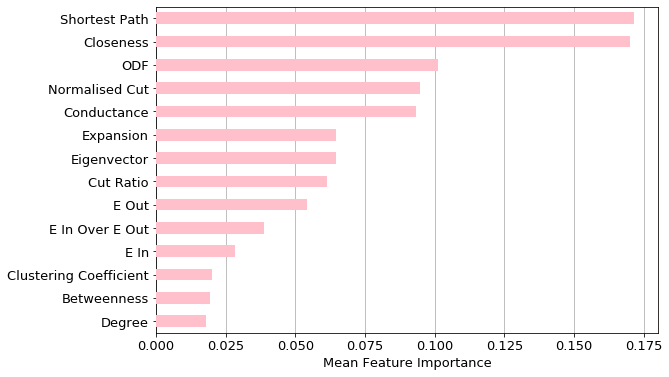

In [36]:
ax = feature_ranking[::-1].plot.barh(fontsize=13, figsize=(9,6), color="pink", zorder=3)
ax.set_xlabel("Mean Feature Importance", fontsize=13)
ax.xaxis.grid()

In [37]:
X_train = pd.read_csv('Infomap/node_x_train.csv', index_col=0)
y_train = pd.read_csv('Infomap/node_y_train.csv', index_col=0)

In [38]:
runs = 100

In [39]:
feature_list = list(X_train.columns)
data = np.array(X_train)
labels = np.squeeze(np.array(y_train))

In [40]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

accuracy_scores = []
feature_importances = {}
for f in feature_list:
    feature_importances[f] = []
rows = []

skf = StratifiedKFold(n_splits=5)
rf = RandomForestClassifier()

fold_count = 0

for run in range(1, runs+1):
    
    for i in range(5):
        
        fold_count += 1
        
        folds = next(skf.split(data, labels), None)
        
        X_train_fold = data[folds[0], :]
        X_val_fold = data[folds[1], :]
        y_train_fold = labels[folds[0]]
        y_val_fold = labels[folds[1]]
        
        model = rf.fit(X_train_fold, y_train_fold)
        predictions = rf.predict(X_val_fold)
    
        accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

        row = {"run": fold_count}
        for j, feature in enumerate(feature_list):
            row[feature] = rf.feature_importances_[j]
        rows.append(row)

In [41]:
print(accuracy_scores[:100])
print('~~~~~~~~~~~~~~~~~~~~~')
print(np.mean(accuracy_scores))

[0.9134466769706336, 0.9180834621329211, 0.9119010819165378, 0.9057187017001546, 0.9149922720247295, 0.9088098918083463, 0.9134466769706336, 0.9165378670788253, 0.910355486862442, 0.9134466769706336, 0.9088098918083463, 0.9149922720247295, 0.919629057187017, 0.9165378670788253, 0.9134466769706336, 0.9180834621329211, 0.9134466769706336, 0.9149922720247295, 0.9072642967542504, 0.9119010819165378, 0.919629057187017, 0.9134466769706336, 0.9149922720247295, 0.9119010819165378, 0.9165378670788253, 0.919629057187017, 0.9149922720247295, 0.919629057187017, 0.9088098918083463, 0.9149922720247295, 0.9149922720247295, 0.9119010819165378, 0.9180834621329211, 0.9119010819165378, 0.9180834621329211, 0.9149922720247295, 0.9180834621329211, 0.9180834621329211, 0.9165378670788253, 0.9165378670788253, 0.9119010819165378, 0.9088098918083463, 0.9134466769706336, 0.9134466769706336, 0.919629057187017, 0.9119010819165378, 0.9134466769706336, 0.9134466769706336, 0.9165378670788253, 0.9149922720247295, 0.916

In [42]:
df_importances = pd.DataFrame(rows).set_index("run")

In [43]:
feature_ranking = df_importances.mean().sort_values(ascending=False)

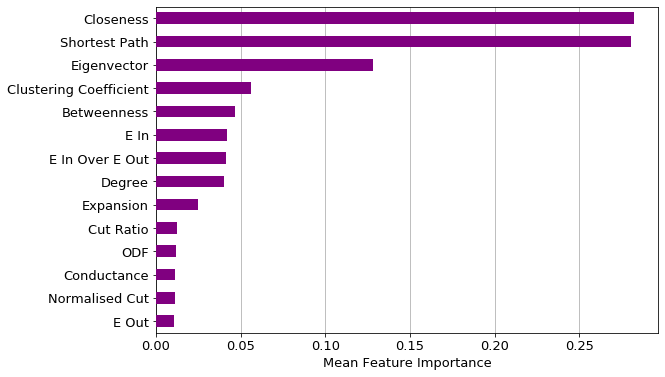

In [44]:
ax = feature_ranking[::-1].plot.barh(fontsize=13, figsize=(9,6), color="purple", zorder=3)
ax.set_xlabel("Mean Feature Importance", fontsize=13)
ax.xaxis.grid()

In [45]:
X_train = pd.read_csv('LPA/node_x_train.csv', index_col=0)
y_train = pd.read_csv('LPA/node_y_train.csv', index_col=0)

In [46]:
runs = 100

In [47]:
feature_list = list(X_train.columns)
data = np.array(X_train)
labels = np.squeeze(np.array(y_train))

In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

accuracy_scores = []
feature_importances = {}
for f in feature_list:
    feature_importances[f] = []
rows = []

skf = StratifiedKFold(n_splits=5)
rf = RandomForestClassifier()

fold_count = 0

for run in range(1, runs+1):
    
    for i in range(5):
        
        fold_count += 1
        
        folds = next(skf.split(data, labels), None)
        
        X_train_fold = data[folds[0], :]
        X_val_fold = data[folds[1], :]
        y_train_fold = labels[folds[0]]
        y_val_fold = labels[folds[1]]
        
        model = rf.fit(X_train_fold, y_train_fold)
        predictions = rf.predict(X_val_fold)
    
        accuracy_scores.append(metrics.accuracy_score(y_val_fold, predictions))

        row = {"run": fold_count}
        for j, feature in enumerate(feature_list):
            row[feature] = rf.feature_importances_[j]
        rows.append(row)

In [49]:
print(accuracy_scores[:100])
print('~~~~~~~~~~~~~~~~~~~~~')
print(np.mean(accuracy_scores))

[0.8763523956723338, 0.884080370942813, 0.874806800618238, 0.8825347758887172, 0.8809891808346213, 0.8825347758887172, 0.8732612055641422, 0.8778979907264297, 0.8794435857805255, 0.8871715610510046, 0.8809891808346213, 0.8686244204018547, 0.8794435857805255, 0.874806800618238, 0.884080370942813, 0.874806800618238, 0.8701700154559505, 0.8887171561051005, 0.8778979907264297, 0.8809891808346213, 0.8778979907264297, 0.8856259659969088, 0.8902627511591963, 0.8763523956723338, 0.874806800618238, 0.884080370942813, 0.8686244204018547, 0.8686244204018547, 0.8717156105100463, 0.8856259659969088, 0.8809891808346213, 0.8825347758887172, 0.8794435857805255, 0.874806800618238, 0.8809891808346213, 0.8763523956723338, 0.874806800618238, 0.884080370942813, 0.884080370942813, 0.8794435857805255, 0.8856259659969088, 0.8794435857805255, 0.8794435857805255, 0.8717156105100463, 0.8918083462132921, 0.8701700154559505, 0.8778979907264297, 0.8809891808346213, 0.8732612055641422, 0.8686244204018547, 0.88098918

In [50]:
df_importances = pd.DataFrame(rows).set_index("run")

In [51]:
feature_ranking = df_importances.mean().sort_values(ascending=False)

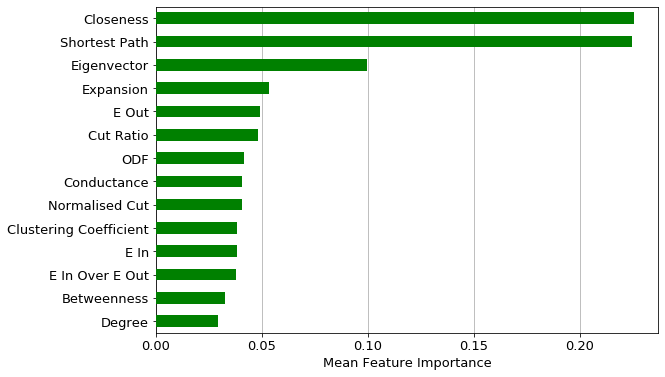

In [52]:
ax = feature_ranking[::-1].plot.barh(fontsize=13, figsize=(9,6), color="green", zorder=3)
ax.set_xlabel("Mean Feature Importance", fontsize=13)
ax.xaxis.grid()